# ISSP Survey - Multiple Correspondence Analysis (MCA)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Extraction---Get-data" data-toc-modified-id="Extraction---Get-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extraction - Get data</a></span></li><li><span><a href="#Exploratory" data-toc-modified-id="Exploratory-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory</a></span></li><li><span><a href="#Transformation" data-toc-modified-id="Transformation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transformation</a></span></li><li><span><a href="#MCA---Survey-questions" data-toc-modified-id="MCA---Survey-questions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>MCA - Survey questions</a></span></li><li><span><a href="#The-End" data-toc-modified-id="The-End-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Imports

In [1]:
# analytical tools
import pandas as pd
import seaborn as sns
import prince

## Extraction - Get data

In [2]:
# Based on Oleg Nenadic and Michael Greenacre (2005), 
# "Computation of Multiple Correspondence Analysis, with code in R"

# Data comprises survey responses to four questions on attitudes
# to science. The questions are labeled A, B, C, D and answered
# on a Likert scale, a 5-point scale (from 1=agree strongly to 
# 5=disagree strongly), and three demographic characteristics: 
# sex (2 categories), age (6 categories), and education (6 cats).
# All of the variables are categorical.

data = pd.read_csv("../data/wg93.zip", sep="\t")
data.head()

,A,B,C,D,sex,age,edu
0,2,3,4,3,2,2,3
1,3,4,2,3,1,3,4
2,2,3,2,4,2,3,2
3,2,2,2,2,1,2,3
4,3,3,3,3,1,5,2


## Exploratory

In [3]:
# Overview - looks like no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       871 non-null    int64
 1   B       871 non-null    int64
 2   C       871 non-null    int64
 3   D       871 non-null    int64
 4   sex     871 non-null    int64
 5   age     871 non-null    int64
 6   edu     871 non-null    int64
dtypes: int64(7)
memory usage: 47.8 KB


<AxesSubplot:>

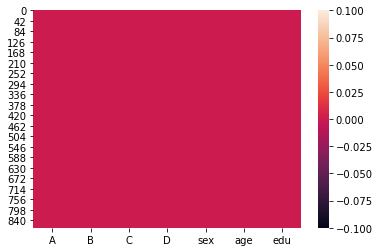

In [4]:
# Any missing values? NO!
sns.heatmap(data.isna())

In [5]:
# value counts
print('========')
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print('========')

A
2    322
3    204
4    178
1    119
5     48
Name: A, dtype: int64
B
4    281
3    205
2    174
5    140
1     71
Name: B, dtype: int64
C
2    316
3    197
4    154
1    152
5     52
Name: C, dtype: int64
D
2    232
4    226
3    202
5    151
1     60
Name: D, dtype: int64
sex
2    444
1    427
Name: sex, dtype: int64
age
2    210
3    158
4    146
6    142
5    124
1     91
Name: age, dtype: int64
edu
2    378
3    242
4     94
6     70
5     49
1     38
Name: edu, dtype: int64


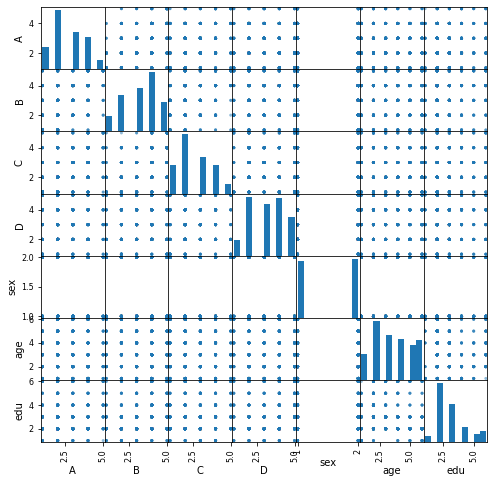

In [6]:
# SPLOM - not that useful with categorical data
_ = pd.plotting.scatter_matrix(data,
    figsize=(8,8), 
)

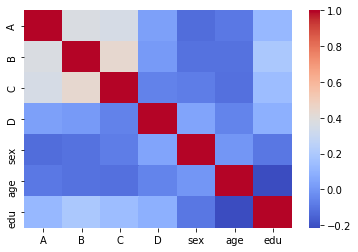

In [7]:
# Correlation matrix - may be misleading and/or 
# meaningless with categorical data
_ = sns.heatmap(data.corr(), 
            cmap='coolwarm',
            xticklabels=True, # want them all printed
            yticklabels=True)

## Transformation

In [8]:
# Trick here: the data values need to look categorical
# for the MCA library to work (not sure why).
# Currently our data values look numerical (being integers)
X = data[data.columns[0:4]].astype(str)

## MCA - Survey questions

In [9]:
mca = prince.MCA(
    n_components=2,
    n_iter=500,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=1,
)

mca = mca.fit(X)

In [10]:
mca.eigenvalues_

[0.45737915399963835, 0.43096579260699946]

In [11]:
mca.row_coordinates(X).head()
# same result as Nenadic and Greenacre - page 5

,0,1
0,-0.210306,-0.443102
1,-0.324688,-0.807454
2,0.229371,-0.512621
3,0.303358,-0.387482
4,-0.276100,-1.091616


In [12]:
mca.row_coordinates(X).tail(1)
# same result as Nenadic and Greenacre - page 5

,0,1
870,0.625955,-0.134506


In [13]:
mca.explained_inertia_
# same result as Nenadic and Greenacre

[0.11434478849990959, 0.10774144815174987]

In [14]:
mca.total_inertia_

4.0

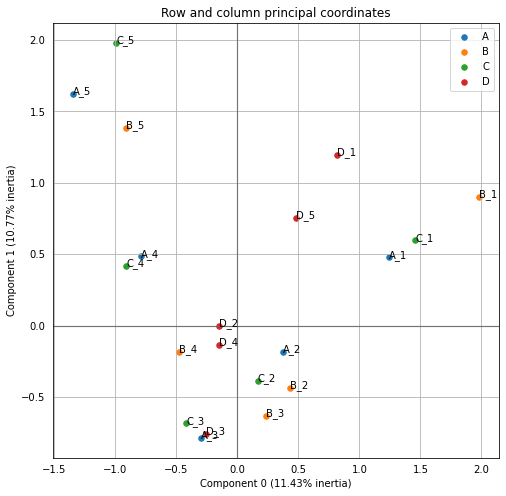

In [15]:
ax = mca.plot_coordinates(
    X=X,
    figsize=(8, 8),
    show_row_points=False,
    #row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1,
)
# same result as Nenadic and Greenacre

In [16]:
# coordinates for the above plot
mca.column_coordinates(X)

,0,1
A_1,1.242107,0.477562
A_2,0.369421,-0.186731
A_3,-0.302168,-0.787408
A_4,-0.788498,0.483683
A_5,-1.349361,1.621522
B_1,1.977713,0.899428
B_2,0.433856,-0.437831
B_3,0.234033,-0.632793
B_4,-0.482962,-0.183861
B_5,-0.915522,1.383648


## The End

In [17]:
print('Finished')

Finished
